# **Mastering PySpark: Big Data Analysis with Flight Delays**

### **Introduction to PySpark**
PySpark is the Python API for Apache Spark, an open-source, distributed computing system designed to process large-scale data. PySpark is widely used for big data processing, machine learning, and streaming due to its scalability, speed, and ease of use.

---

### **Why Use PySpark?**
1. **Distributed Computing**: Automatically distributes data and computations across a cluster.
2. **Fault Tolerance**: Ensures data is not lost due to node failures.
3. **Ease of Use**: Provides simple APIs in Python while harnessing the power of Spark.
4. **Big Data Ready**: Efficiently handles datasets too large for a single machine.
5. **Integration**: Compatible with Hadoop, SQL, and Python libraries.

---

### **Core PySpark Concepts and Terminologies**

#### **1. SparkSession**
- **Definition**: The entry point for any PySpark application, managing configurations and the Spark cluster.
- **Usage**:
  ```python
  from pyspark.sql import SparkSession
  spark = SparkSession.builder.appName("PySpark Guide").getOrCreate()
  ```

#### **2. RDD (Resilient Distributed Dataset)**
- **Definition**: The core data structure in Spark, designed for fault-tolerant and distributed data processing.
- **Key Features**:
  - Immutable: Once created, RDDs cannot be modified.
  - Partitioned: Data is split into partitions for parallel processing.
  - Lazy Evaluation: Transformations are only executed when an action is triggered.
- **Operations**:
  - **Transformations**: `map`, `filter`, `flatMap`, `reduceByKey`.
  - **Actions**: `collect`, `count`, `take`.

#### **3. DataFrames**
- **Definition**: A distributed collection of data organized into rows and columns, similar to a database table or Pandas DataFrame.
- **Features**:
  - Schema support for structured data.
  - Optimized for performance with Catalyst Optimizer.
- **Operations**:
  - Selecting: `select`, `filter`, `where`.
  - Aggregations: `groupBy`, `agg`, `count`.

#### **4. Dataset**
- **Definition**: Strongly-typed DataFrame-like structure introduced for statically-typed languages (Java/Scala). Not common in PySpark.

#### **5. PySpark SQL**
- **Definition**: Module for querying structured data using SQL.
- **Key Operations**:
  - Register a DataFrame as a temporary SQL table:
    ```python
    df.createOrReplaceTempView("table_name")
    spark.sql("SELECT * FROM table_name").show()
    ```

#### **6. PySpark MLlib**
- **Definition**: A machine learning library for scalable machine learning.
- **Key Features**:
  - Classification and Regression: Logistic regression, linear regression.
  - Clustering: K-means.
  - Recommendation Systems: Collaborative filtering.
  - Feature Engineering: VectorAssembler, StandardScaler.
  - Model Evaluation: RegressionEvaluator.

#### **7. Transformations**
- **Definition**: Lazy operations that define how data should be transformed but do not execute immediately.
- **Examples**:
  - `map()`: Applies a function to each element.
  - `filter()`: Filters data based on a condition.

#### **8. Actions**
- **Definition**: Triggers the execution of transformations and returns a result.
- **Examples**:
  - `count()`: Counts the number of elements.
  - `collect()`: Returns all elements in the RDD/DataFrame.

#### **9. Partitions**
- **Definition**: Logical divisions of data within an RDD or DataFrame.
- **Importance**:
  - Improves parallelism.
  - Can be controlled using `repartition` or `coalesce`.

#### **10. Catalyst Optimizer**
- **Definition**: An optimization engine for DataFrame queries to improve execution plans.

#### **11. Tungsten Engine**
- **Definition**: Optimizes Spark jobs by improving CPU and memory utilization.

#### **12. Lazy Evaluation**
- **Definition**: Operations are not executed until an action is triggered, optimizing the execution plan.

#### **13. Broadcast Variables**
- **Definition**: Used to cache a value on all nodes for efficient access.
- **Usage**:
  ```python
  broadcastVar = spark.sparkContext.broadcast([1, 2, 3])
  ```

#### **14. Accumulators**
- **Definition**: Write-only shared variables for aggregating data across nodes.

#### **15. PySpark Streaming**
- **Definition**: Enables real-time processing of streaming data.
- **Key Concepts**:
  - DStream: Continuous stream of data.
  - Window Operations: Aggregations over a sliding window.

#### **16. PySpark Structured Streaming**
- **Definition**: High-level API for stream processing using SQL and DataFrames.

#### **17. Serialization**
- **Definition**: Converts data for transmission over the network or storage.

---

### **PySpark Architecture**

1. **Driver Program**:
   - Manages application lifecycle and scheduling tasks.
2. **Executors**:
   - Run tasks assigned by the driver program.
3. **Cluster Manager**:
   - Allocates resources for applications (e.g., YARN, Mesos).

---

### **PySpark Walkthrough: Learning PySpark Step by Step with Flight Delay Dataset**

This notebook is designed as a **step-by-step guide** to learn PySpark. It explains each concept in detail using the **Flight Delay dataset** and focuses on building an understanding of PySpark, its operations, and real-world applications.


## **Step 1: Understanding PySpark**
**What is PySpark?**
- PySpark is the Python API for Apache Spark.
- Apache Spark is a distributed computing framework for big data processing.
- PySpark provides a way to write Spark applications using Python, enabling scalability for large datasets.

## **Step 2: Install and Import Libraries**

### **Installing PySpark**
PySpark can be installed using pip:

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.4-py2.py3-none-any.whl size=317849765 sha256=355969435b3899b25b8a2473b4b41e63704659fab7ba1152d479c5c5ab38e4b9
  Stored in directory: /root/.cache/pip/wheels/d9/1c/98/31e395a42d1735d18d42124971ecbbade844b50bb9845b6f4a
Successfully built pyspark


### **Importing Required Libraries**

In [2]:
import os  # For working with file paths
import time  # To calculate execution times
import pandas as pd  # For handling smaller datasets and debugging
import pyspark.sql.functions as F  # For transformations and aggregations
from pyspark.sql import SparkSession  # To start a PySpark session

## **Step 3: Creating a SparkSession**

A `SparkSession` is the starting point for any PySpark application. It allows us to interact with Spark.

In [3]:
spark = SparkSession.builder \
    .appName("Flight Delay Analysis") \
    .getOrCreate()

**Explanation:**
- `appName`: Assigns a name to the Spark application.
- `getOrCreate`: Creates a new session or retrieves an existing one.

## **Step 4: Loading the Dataset**

PySpark allows us to load various types of files such as CSV, JSON, and Parquet. Here, we load the datasets.

In [4]:
# File paths for datasets
file_path_flights = '/kaggle/input/fligths-delays/flights.csv'
file_path_airlines = '/kaggle/input/fligths-delays/airlines.csv'
file_path_airports = '/kaggle/input/fligths-delays/airports.csv'

# Loading datasets
flights = spark.read.csv(file_path_flights, header=True, inferSchema=True)
airlines = spark.read.csv(file_path_airlines, header=True, inferSchema=True)
airports = spark.read.csv(file_path_airports, header=True, inferSchema=True)

**Key Options:**
- `header=True`: Indicates the first row contains column names.
- `inferSchema=True`: Automatically infers the data types for each column.

## **Step 5: Exploring the Data**

### **5.1 Displaying Rows**
Use `.show()` to display rows from a DataFrame:

In [5]:
flights.show(5)

+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR_|MONTH_|DAY_|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+-

### **5.2 Checking Schema**
Use `.printSchema()` to view the structure of the DataFrame:

In [6]:
flights.printSchema()

root
 |-- YEAR_: integer (nullable = true)
 |-- MONTH_: integer (nullable = true)
 |-- DAY_: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (n

**Explanation:**
- Shows the column names, data types, and whether the columns allow null values.

### **5.3 Counting Rows**

In [7]:
print(f"Number of rows in the Flights dataset: {flights.count()}")

Number of rows in the Flights dataset: 1048575


## **Step 6: Data Cleaning**

### **6.1 Handling Missing Data**
To check for missing values:

In [8]:
# Count missing values for each column
missing_values = flights.select([
    F.count(F.when(F.col(c).isNull(), 1)).alias(c) for c in flights.columns
]).collect()[0]

# Format and print the results
print("Missing Values Per Column:")
for col, count in missing_values.asDict().items():
    print(f"{col}: {count}")

Missing Values Per Column:
YEAR_: 0
MONTH_: 0
DAY_: 0
DAY_OF_WEEK: 0
AIRLINE: 0
FLIGHT_NUMBER: 0
TAIL_NUMBER: 7750
ORIGIN_AIRPORT: 0
DESTINATION_AIRPORT: 0
SCHEDULED_DEPARTURE: 0
DEPARTURE_TIME: 39515
DEPARTURE_DELAY: 39515
TAXI_OUT: 40229
WHEELS_OFF: 40229
SCHEDULED_TIME: 2
ELAPSED_TIME: 43071
AIR_TIME: 43071
DISTANCE: 0
WHEELS_ON: 41296
TAXI_IN: 41296
SCHEDULED_ARRIVAL: 0
ARRIVAL_TIME: 41296
ARRIVAL_DELAY: 43071
DIVERTED: 0
CANCELLED: 0
CANCELLATION_REASON: 1008048
AIR_SYSTEM_DELAY: 820047
SECURITY_DELAY: 820047
AIRLINE_DELAY: 820047
LATE_AIRCRAFT_DELAY: 820047
WEATHER_DELAY: 820047


### **Step 6.2: Strategies for Handling Missing Data**

#### **1. Dropping Rows or Columns**
   - Drop rows or columns with missing data if the proportion of missing values is significant or if the column is not critical for analysis.

In [9]:
# Drop rows with any missing values
flights_cleaned = flights.dropna()

# Drop rows with missing values in specific columns
flights_cleaned = flights.dropna(subset=['TAIL_NUMBER', 'DEPARTURE_TIME'])

# Drop columns with a high proportion of missing values
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
                  'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_cleaned = flights.drop(*columns_to_drop)

#### **2. Filling Missing Values**
   - Replace missing values with statistical measures or placeholders.

In [10]:
# Fill missing numerical values with mean or median
flights = flights.fillna({'DEPARTURE_DELAY': flights.select(F.mean('DEPARTURE_DELAY')).collect()[0][0]})

# Fill missing categorical values with a placeholder
flights = flights.fillna({'TAIL_NUMBER': 'Unknown'})

In [11]:
from pyspark.sql.window import Window

# Fill missing values forward
window_spec = Window.partitionBy('ORIGIN_AIRPORT').orderBy('SCHEDULED_DEPARTURE')
flights = flights.withColumn('DEPARTURE_TIME', 
                            F.last('DEPARTURE_TIME', ignorenulls=True).over(window_spec))

In [12]:
# Replace missing ARRIVAL_DELAY values with DEPARTURE_DELAY + SCHEDULED_TIME (if logical)
flights = flights.withColumn('ARRIVAL_DELAY', 
                            F.when(F.col('ARRIVAL_DELAY').isNull(), 
                                   F.col('DEPARTURE_DELAY') + F.col('SCHEDULED_TIME')).otherwise(F.col('ARRIVAL_DELAY')))

In [13]:
# Impute ELAPSED_TIME if AIR_TIME, TAXI_OUT, and TAXI_IN are available
flights_cleaned = flights_cleaned.withColumn(
    'ELAPSED_TIME',
    F.when(F.col('ELAPSED_TIME').isNull() & F.col('AIR_TIME').isNotNull() & F.col('TAXI_OUT').isNotNull() & F.col('TAXI_IN').isNotNull(),
           F.col('AIR_TIME') + F.col('TAXI_OUT') + F.col('TAXI_IN')).otherwise(F.col('ELAPSED_TIME'))
)

# Impute AIR_TIME using ELAPSED_TIME
flights_cleaned = flights_cleaned.withColumn(
    'AIR_TIME',
    F.when(F.col('AIR_TIME').isNull() & F.col('ELAPSED_TIME').isNotNull() & F.col('TAXI_OUT').isNotNull() & F.col('TAXI_IN').isNotNull(),
           F.col('ELAPSED_TIME') - F.col('TAXI_OUT') - F.col('TAXI_IN')).otherwise(F.col('AIR_TIME'))
)

# Impute WHEELS_ON using WHEELS_OFF and AIR_TIME
flights_cleaned = flights_cleaned.withColumn(
    'WHEELS_ON',
    F.when(F.col('WHEELS_ON').isNull() & F.col('WHEELS_OFF').isNotNull() & F.col('AIR_TIME').isNotNull(),
           F.col('WHEELS_OFF') + F.col('AIR_TIME')).otherwise(F.col('WHEELS_ON'))
)

# Impute ARRIVAL_TIME using WHEELS_ON and TAXI_IN
flights_cleaned = flights_cleaned.withColumn(
    'ARRIVAL_TIME',
    F.when(F.col('ARRIVAL_TIME').isNull() & F.col('WHEELS_ON').isNotNull() & F.col('TAXI_IN').isNotNull(),
           F.col('WHEELS_ON') + F.col('TAXI_IN')).otherwise(F.col('ARRIVAL_TIME'))
)

# Impute TAXI_IN using ARRIVAL_TIME and WHEELS_ON
flights_cleaned = flights_cleaned.withColumn(
    'TAXI_IN',
    F.when(F.col('TAXI_IN').isNull() & F.col('ARRIVAL_TIME').isNotNull() & F.col('WHEELS_ON').isNotNull(),
           F.col('ARRIVAL_TIME') - F.col('WHEELS_ON')).otherwise(F.col('TAXI_IN'))
)

# Impute ARRIVAL_DELAY using ARRIVAL_TIME and SCHEDULED_ARRIVAL
flights_cleaned = flights_cleaned.withColumn(
    'ARRIVAL_DELAY',
    F.when(F.col('ARRIVAL_DELAY').isNull() & F.col('ARRIVAL_TIME').isNotNull() & F.col('SCHEDULED_ARRIVAL').isNotNull(),
           F.col('ARRIVAL_TIME') - F.col('SCHEDULED_ARRIVAL')).otherwise(F.col('ARRIVAL_DELAY'))
)

# Recheck missing values after further imputation
missing_values_final = flights_cleaned.select([
    F.count(F.when(F.col(c).isNull(), 1)).alias(c) for c in flights_cleaned.columns
]).collect()[0]

print("Missing Values Per Column After Final Handling:")
for col, count in missing_values_final.asDict().items():
    print(f"{col}: {count}")


Missing Values Per Column After Final Handling:
YEAR_: 0
MONTH_: 0
DAY_: 0
DAY_OF_WEEK: 0
AIRLINE: 0
FLIGHT_NUMBER: 0
TAIL_NUMBER: 7750
ORIGIN_AIRPORT: 0
DESTINATION_AIRPORT: 0
SCHEDULED_DEPARTURE: 0
DEPARTURE_TIME: 39515
DEPARTURE_DELAY: 39515
TAXI_OUT: 40229
WHEELS_OFF: 40229
SCHEDULED_TIME: 2
ELAPSED_TIME: 43071
AIR_TIME: 43071
DISTANCE: 0
WHEELS_ON: 41296
TAXI_IN: 41296
SCHEDULED_ARRIVAL: 0
ARRIVAL_TIME: 41296
ARRIVAL_DELAY: 41296
DIVERTED: 0
CANCELLED: 0


### **Step 6.3: Visualizing Missing Data**
   - Understanding the extent and patterns of missing data is crucial.

   **Visualization**:
   PySpark doesn’t have built-in visualization tools, so exporting data to Pandas for missing data visualization is an option:

Missing Values Per Column After Handling:
YEAR_: 0
MONTH_: 0
DAY_: 0
DAY_OF_WEEK: 0
AIRLINE: 0
FLIGHT_NUMBER: 0
TAIL_NUMBER: 7750
ORIGIN_AIRPORT: 0
DESTINATION_AIRPORT: 0
SCHEDULED_DEPARTURE: 0
DEPARTURE_TIME: 39515
DEPARTURE_DELAY: 39515
TAXI_OUT: 40229
WHEELS_OFF: 40229
SCHEDULED_TIME: 2
ELAPSED_TIME: 43071
AIR_TIME: 43071
DISTANCE: 0
WHEELS_ON: 41296
TAXI_IN: 41296
SCHEDULED_ARRIVAL: 0
ARRIVAL_TIME: 41296
ARRIVAL_DELAY: 41296
DIVERTED: 0
CANCELLED: 0


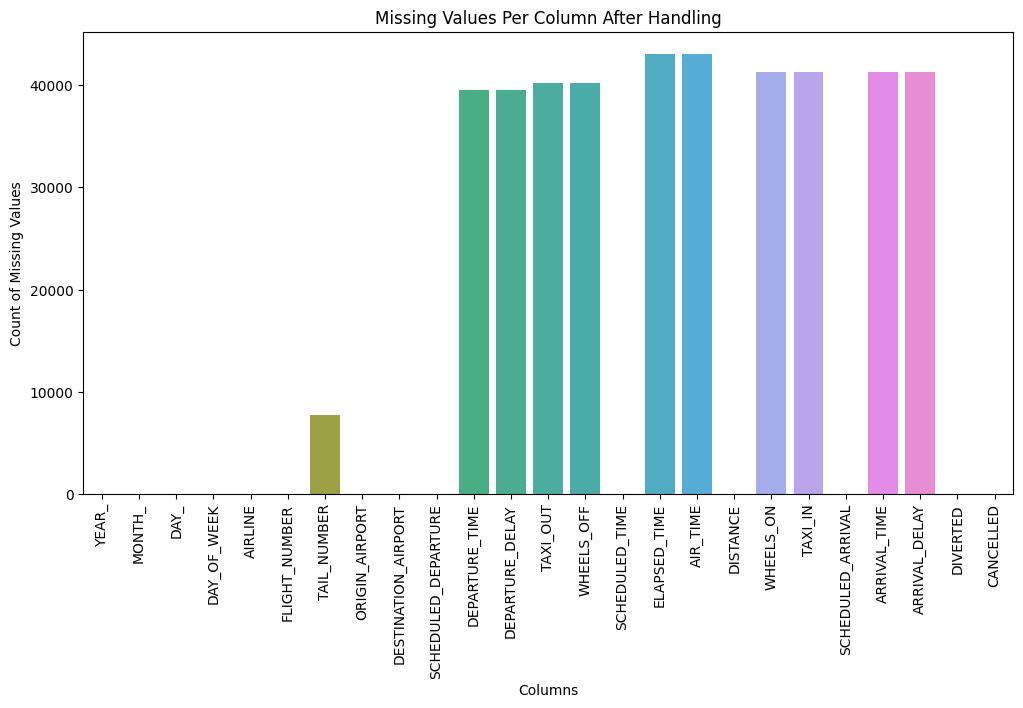

In [14]:
# Count missing values for each column after handling
missing_values_cleaned = flights_cleaned.select([
    F.count(F.when(F.col(c).isNull(), 1)).alias(c) for c in flights_cleaned.columns
]).collect()[0]

# Format and print the results
print("Missing Values Per Column After Handling:")
for col, count in missing_values_cleaned.asDict().items():
    print(f"{col}: {count}")

# Convert to Pandas for visualization
missing_values_df = pd.DataFrame(flights_cleaned.select([
    F.count(F.when(F.col(c).isNull(), 1)).alias(c) for c in flights_cleaned.columns
]).collect()[0].asDict().items(), columns=['Column', 'MissingCount'])

# Plot missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=missing_values_df, x='Column', y='MissingCount')
plt.title("Missing Values Per Column After Handling")
plt.xticks(rotation=90)
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()

### **6.2 Dropping Columns**
Columns that are not needed for analysis can be dropped:

In [15]:
flights = flights.drop('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY')

columns_to_drop = [
    "CANCELLATION_REASON", 
    "AIR_SYSTEM_DELAY", 
    "SECURITY_DELAY", 
    "AIRLINE_DELAY", 
    "LATE_AIRCRAFT_DELAY", 
    "WEATHER_DELAY"
]
flights = flights.drop(*columns_to_drop)


### **6.3 Replacing Null Values**
Replace null values with default values:

In [16]:
flights = flights.fillna({
    "DEPARTURE_DELAY": 0,
    "TAXI_OUT": 0,
    "ELAPSED_TIME": 0,
    "AIR_TIME": 0,
    "DISTANCE": 0
})

## **Step 7: Data Transformation**

### **7.1 Adding New Columns**
Create a new column for flight duration in hours:

In [17]:
flights = flights.withColumn("duration_hrs", F.col("AIR_TIME") / 60)
flights.select("AIR_TIME", "duration_hrs").show(5)

+--------+-----------------+
|AIR_TIME|     duration_hrs|
+--------+-----------------+
|     169|2.816666666666667|
|     263|4.383333333333334|
|     266|4.433333333333334|
|     258|              4.3|
|     199|3.316666666666667|
+--------+-----------------+
only showing top 5 rows



### **7.2 Filtering Rows**
Filter flights with delays greater than 30 minutes:

In [18]:
delayed_flights = flights.filter(F.col("DEPARTURE_DELAY") > 30)
delayed_flights.show(5)

+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+
|YEAR_|MONTH_|DAY_|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|       duration_hrs|
+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+
| 2015|     1|  22|          4|     MQ| 

### **7.3 Grouping and Aggregations**
Find the average delay for each airline:

In [19]:
avg_delay = flights.groupBy("AIRLINE").agg(F.avg("DEPARTURE_DELAY").alias("avg_delay"))
avg_delay.show()

+-------+------------------+
|AIRLINE|         avg_delay|
+-------+------------------+
|     UA|15.004406090907015|
|     NK| 15.96033040995309|
|     AA| 11.31399604301428|
|     EV|11.305963706994227|
|     B6|15.646344249018835|
|     DL|  9.69044519479815|
|     OO|11.255128432571732|
|     F9| 22.99734133206081|
|     US| 7.707486949230478|
|     MQ| 17.33153725214843|
|     HA| 1.568103021297672|
|     AS|2.9537380968460862|
|     VX|10.315870421993656|
|     WN|10.090957912503498|
+-------+------------------+



## **Step 8: SQL Queries**

PySpark supports SQL queries using temporary views. 

### **8.1 Creating a Temporary View**

In [20]:
flights.createOrReplaceTempView("flights_view")

### **8.2 Running SQL Queries**

In [21]:
sql_result = spark.sql("""
    SELECT AIRLINE, AVG(DEPARTURE_DELAY) as avg_delay
    FROM flights_view
    GROUP BY AIRLINE
    ORDER BY avg_delay DESC
""")
sql_result.show()

+-------+------------------+
|AIRLINE|         avg_delay|
+-------+------------------+
|     F9| 22.99734133206081|
|     MQ| 17.33153725214843|
|     NK| 15.96033040995309|
|     B6|15.646344249018835|
|     UA|15.004406090907015|
|     AA| 11.31399604301428|
|     EV|11.305963706994227|
|     OO|11.255128432571732|
|     VX|10.315870421993656|
|     WN|10.090957912503498|
|     DL|  9.69044519479815|
|     US| 7.707486949230478|
|     AS|2.9537380968460862|
|     HA| 1.568103021297672|
+-------+------------------+



## **Step 9: Joining DataFrames**

### **Joining Flights with Airlines**

In [22]:
flights_with_airlines = flights.join(airlines, flights.AIRLINE == airlines.IATA_CODE, "inner")
flights_with_airlines.show(5)

+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+---------+--------------------+
|YEAR_|MONTH_|DAY_|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|       duration_hrs|IATA_CODE|             AIRLINE|
+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------

## **Step 10: Saving the Data**

Save the DataFrame in Parquet format for optimized storage and querying:

In [23]:
flights.write.parquet("flights.parquet", mode="overwrite")

## **Step 11: Advanced PySpark**

### **11.1 Caching**
Cache data for faster repeated operations:

In [24]:
## **Step 11: Advanced PySpark**

flights.cache()
print(flights.is_cached)  # True if cached

True


### **11.2 Partitioning**
Partition the data for better performance in distributed systems:

In [25]:
flights = flights.repartition(5)  # 5 partitions

### **11.3 Writing Custom Functions**
Apply a custom Python function using `.withColumn`:

In [26]:
from pyspark.sql.types import StringType

def label_delay(delay):
    return "High Delay" if delay > 60 else "Low Delay"

# Register the function
label_delay_udf = F.udf(label_delay, StringType())

# Apply to DataFrame
flights = flights.withColumn("Delay_Label", label_delay_udf("DEPARTURE_DELAY"))
flights.select("DEPARTURE_DELAY", "Delay_Label").show(5)

+---------------+-----------+
|DEPARTURE_DELAY|Delay_Label|
+---------------+-----------+
|            108| High Delay|
|             87| High Delay|
|            -11|  Low Delay|
|             -5|  Low Delay|
|              0|  Low Delay|
+---------------+-----------+
only showing top 5 rows



## **Step 12: Visualization**

To visualize the results, convert to Pandas:

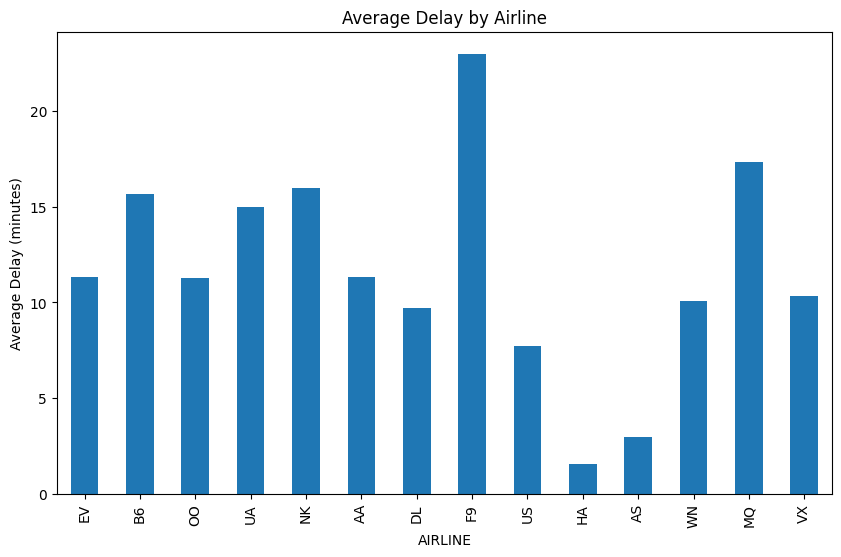

In [27]:
import matplotlib.pyplot as plt

# Example: Plot average delays per airline
avg_delay_pd = avg_delay.toPandas()
avg_delay_pd.plot(kind='bar', x='AIRLINE', y='avg_delay', legend=False, figsize=(10, 6))
plt.title("Average Delay by Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()

---
### **Advanced Topics in PySpark: Machine Learning and Optimization**

This section explores how to apply **machine learning (ML)** and **optimization techniques** using PySpark. We'll use the **Flight Delay dataset** to predict delays and optimize data processing workflows.


## **Step 13: Introduction to PySpark MLlib**

PySpark’s `MLlib` provides tools for machine learning, including:
- Data preparation
- Feature transformation
- Model training and evaluation

### **MLlib Key Concepts**
1. **DataFrame-Based API**: Works seamlessly with PySpark DataFrames.
2. **Pipeline Architecture**: Simplifies building workflows by chaining steps.
3. **Scalability**: Optimized for big data.

## **Step 14: Feature Engineering**

Machine learning requires numerical features. Here’s how to prepare the data:

### **14.1 Label Encoding**
Convert categorical columns (e.g., `AIRLINE`) to numeric values:

In [28]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="AIRLINE", outputCol="AIRLINE_Indexed")
flights = indexer.fit(flights).transform(flights)
flights.select("AIRLINE", "AIRLINE_Indexed").show(5)

+-------+---------------+
|AIRLINE|AIRLINE_Indexed|
+-------+---------------+
|     EV|            2.0|
|     EV|            2.0|
|     EV|            2.0|
|     EV|            2.0|
|     EV|            2.0|
+-------+---------------+
only showing top 5 rows



### **14.2 Vector Assembler**
Combine multiple columns into a single feature vector:

In [29]:
flights.select([F.sum(F.when(F.col(c).isNull(), 1)).alias(c) for c in ["MONTH_", "DAY_", "AIRLINE_Indexed", "DISTANCE", "DEPARTURE_DELAY"]]).show()


+------+----+---------------+--------+---------------+
|MONTH_|DAY_|AIRLINE_Indexed|DISTANCE|DEPARTURE_DELAY|
+------+----+---------------+--------+---------------+
|  NULL|NULL|           NULL|    NULL|           NULL|
+------+----+---------------+--------+---------------+



In [30]:
flights = flights.fillna({
    "MONTH_": 1,               # Default to January
    "DAY_": 1,                 # Default to the 1st day of the month
    "AIRLINE_Indexed": 0.0,    # Default to an index value
    "DISTANCE": 0,             # Default distance
    "DEPARTURE_DELAY": 0       # Default delay
})

In [31]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["MONTH_", "DAY_", "AIRLINE_Indexed", "DISTANCE", "DEPARTURE_DELAY"],
    outputCol="features"
)
flights = assembler.transform(flights)
flights.select("features", "ARRIVAL_DELAY").show(5, truncate=False)

+-------------------------+-------------+
|features                 |ARRIVAL_DELAY|
+-------------------------+-------------+
|[2.0,16.0,2.0,378.0,49.0]|34           |
|[2.0,12.0,2.0,378.0,-2.0]|33           |
|[2.0,12.0,2.0,378.0,-5.0]|17           |
|[2.0,26.0,2.0,378.0,-5.0]|-24          |
|[2.0,19.0,2.0,378.0,8.0] |7            |
+-------------------------+-------------+
only showing top 5 rows



## **Step 15: Splitting the Data**

Split the dataset into training and testing sets:

In [32]:
flights.filter(F.col("ARRIVAL_DELAY").isNull()).count()  # Count nulls
flights.filter(F.isnan("ARRIVAL_DELAY")).count()        # Count NaN values
flights = flights.fillna({"ARRIVAL_DELAY": 0})

In [33]:
train_data, test_data = flights.randomSplit([0.8, 0.2], seed=42)
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")

Training Data Count: 838546
Test Data Count: 210029


## **Step 16: Building a Machine Learning Model**

### **16.1 Linear Regression**
Train a regression model to predict `ARRIVAL_DELAY`:

In [34]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="ARRIVAL_DELAY")
lr_model = lr.fit(train_data)

print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

Coefficients: [2.47120258963848,0.0015124431360829973,0.8166959731972462,-0.0006612515087532476,1.024591248547874]
Intercept: -4.86385642606268


### **16.2 Evaluating the Model**
Evaluate the model on test data:

In [35]:
test_results = lr_model.evaluate(test_data)

print(f"RMSE: {test_results.rootMeanSquaredError}")
print(f"R^2: {test_results.r2}")

RMSE: 33.514249981469305
R^2: 0.5902764656968167


### **16.3 Random Forest for Classification**
Use Random Forest to classify flights as **on-time** or **delayed**:

In [36]:
flights = flights.withColumn("Delayed", F.when(F.col("ARRIVAL_DELAY") > 15, 1).otherwise(0))
flights.select("ARRIVAL_DELAY", "Delayed").show(5)
flights.printSchema()

+-------------+-------+
|ARRIVAL_DELAY|Delayed|
+-------------+-------+
|          -13|      0|
|            3|      0|
|            0|      0|
|            5|      0|
|           84|      1|
+-------------+-------+
only showing top 5 rows

root
 |-- YEAR_: integer (nullable = true)
 |-- MONTH_: integer (nullable = false)
 |-- DAY_: integer (nullable = false)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = false)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = false)
 |-- TAXI_OUT: integer (nullable = false)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = false)
 |-- AIR_TIME: integer (nullable = false)


In [37]:
from pyspark.ml.classification import RandomForestClassifier

train_data, test_data = flights.randomSplit([0.8, 0.2], seed=42)

# Add a binary label for delay classification
flights = flights.withColumn("Delayed", F.when(F.col("ARRIVAL_DELAY") > 15, 1).otherwise(0))

# Train the model
rf = RandomForestClassifier(featuresCol="features", labelCol="Delayed")
rf_model = rf.fit(train_data)

# Predict
predictions = rf_model.transform(test_data)
predictions.select("Delayed", "prediction", "probability").show(5, truncate=False)

+-------+----------+----------------------------------------+
|Delayed|prediction|probability                             |
+-------+----------+----------------------------------------+
|0      |0.0       |[0.9257673684934116,0.07423263150658853]|
|1      |1.0       |[0.30712129939409455,0.6928787006059054]|
|0      |0.0       |[0.9257673684934116,0.07423263150658853]|
|0      |0.0       |[0.9257673684934116,0.07423263150658853]|
|1      |0.0       |[0.9257673684934116,0.07423263150658853]|
+-------+----------+----------------------------------------+
only showing top 5 rows



### **16.4 Model Evaluation**
Evaluate classification accuracy:

In [38]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Delayed", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9008898771122084


## **Step 17: Optimization Techniques**

Optimization is critical for processing large datasets efficiently. Here’s how to optimize PySpark workflows:
### **17.1 Partitioning**
Repartitioning improves parallelism for large datasets:

In [39]:
flights = flights.repartition(10)  # Repartition to 10 partitions
print(f"Number of partitions: {flights.rdd.getNumPartitions()}")

Number of partitions: 10


### **17.2 Caching**
Cache frequently used data:

In [40]:
flights.cache()
flights.count()  # Trigger caching

1048575

### **17.3 Broadcast Variables**
Use broadcast variables for small lookup tables:

In [41]:
from pyspark.sql.functions import broadcast

airlines_broadcast = broadcast(airlines)
flights_with_airlines = flights.join(airlines_broadcast, flights.AIRLINE == airlines.IATA_CODE)
flights_with_airlines.show(5)

+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+------------------+-----------+---------------+--------------------+-------+---------+--------------------+
|YEAR_|MONTH_|DAY_|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|      duration_hrs|Delay_Label|AIRLINE_Indexed|            features|Delayed|IATA_CODE|             AIRLINE|
+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+

### **17.4 Using Parquet for Storage**
Parquet is optimized for Spark:

In [42]:
flights.write.parquet("flights.parquet", mode="overwrite")
optimized_flights = spark.read.parquet("flights.parquet")

## **Step 18: Visualization**

PySpark lacks native visualization tools, but you can use Pandas and Matplotlib for visualizations:

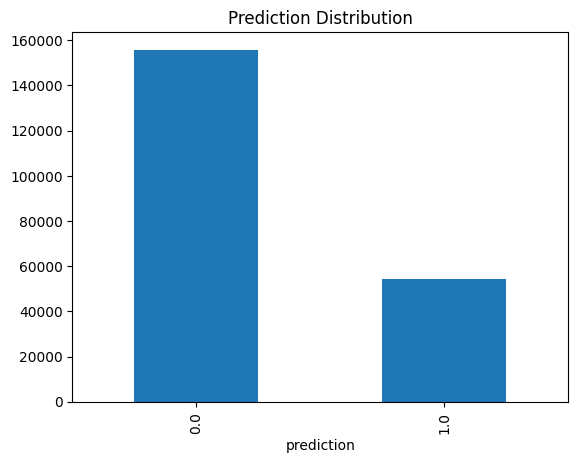

In [43]:
import matplotlib.pyplot as plt

# Convert predictions to Pandas
predictions_pd = predictions.select("Delayed", "prediction").toPandas()

# Plot predictions
predictions_pd["prediction"].value_counts().plot(kind="bar", title="Prediction Distribution")
plt.show()

## **Conclusion**

PySpark is a robust and versatile framework for big data processing, offering a wide range of tools and functionalities to analyze, transform, and model large datasets efficiently. Through this walkthrough, we explored essential PySpark concepts step-by-step, starting from the basics of creating Spark sessions and loading datasets to advanced techniques like machine learning pipelines, graph processing, and streaming.

### **Key Takeaways**
1. **Scalability**: PySpark allows you to handle vast amounts of data distributed across clusters, making it ideal for big data analytics.
2. **Flexibility**: With its modular structure, PySpark supports batch processing, real-time streaming, and machine learning tasks seamlessly.
3. **Integration**: PySpark integrates well with other tools and libraries like Pandas, SQL, and MLlib, allowing flexibility in workflows.
4. **Optimization**: Techniques like partitioning, caching, and broadcasting optimize performance for faster execution.
5. **Real-World Applications**: PySpark is widely used in industries for applications like predictive modeling, fraud detection, and network analysis.

### **Practical Insights**
- PySpark's DataFrame API simplifies data manipulation, resembling SQL-like operations for ease of use.
- Pipelines in PySpark streamline the workflow by encapsulating multiple stages of data preprocessing and modeling.
- Structured Streaming facilitates real-time analytics, making it suitable for monitoring and responding to live events.
- GraphFrames extend PySpark’s capability for graph-based problems, enabling relationship and connectivity analysis.

### **Future Scope**
As data volumes grow exponentially, PySpark will remain a cornerstone of big data analytics. Learning PySpark provides a competitive edge in fields like data science, machine learning, and real-time data engineering. Enhancing skills in advanced topics like Delta Lake, Spark Streaming, and integrating PySpark with cloud services like AWS and Azure will open up more opportunities.
